In [2]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits

# RSS

In [3]:
rss = fits.open('/Users/lauragaravito/Downloads/manga_8244_12704/manga-8244-12704-LOGRSS.fits')
flux_rss = rss['FLUX'].data
ivar_rss = rss['IVAR'].data
mask_rss = rss['MASK'].data
wave_rss = rss['WAVE'].data
xpos = rss['XPOS'].data
ypos = rss['YPOS'].data

Text(0, 0.5, '1E-17 erg/s/cm^2/Ang/fiber')

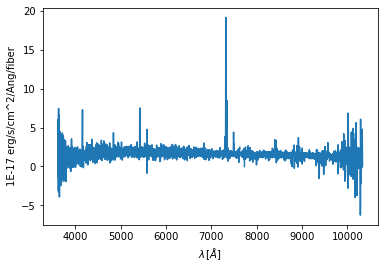

In [4]:
# Create masked array to skip plotting of bad pixels
bad_bits = (mask_rss != 0)
flux_rss_m = np.ma.array(flux_rss, mask=bad_bits)

# find the ind_center using ds9
ind_center = 200
plt.plot(wave_rss, flux_rss_m[ind_center])
plt.xlabel('$\lambda \, [\AA]$')
plt.ylabel(rss['FLUX'].header['BUNIT'])

# CUBE

In [5]:
import os
import numpy as np
import matplotlib.pyplot as plt
from astropy import wcs
from astropy.io import fits

In [6]:
cube = fits.open('/Users/lauragaravito/Downloads/manga_8244_12704/manga-8244-12704-LINCUBE.fits')

In [7]:
# Re-order FLUX, IVAR, and MASK arrays from (wavelength, DEC, RA) to (RA, DEC, wavelength).
flux = np.transpose(cube['FLUX'].data, axes=(2, 1, 0))
ivar = np.transpose(cube['IVAR'].data, axes=(2, 1, 0))
mask = np.transpose(cube['MASK'].data, axes=(2, 1, 0))

wave = cube['WAVE'].data
flux_header = cube['FLUX'].header

Text(0, 0.5, '1E-17 erg/s/cm^2/Ang/spaxel')

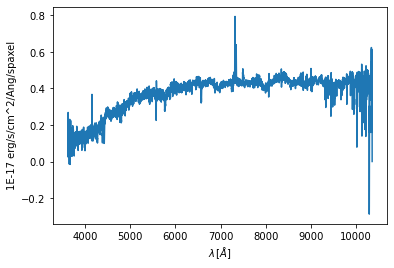

In [8]:
x_center = int(flux_header['CRPIX1']) - 1
y_center = int(flux_header['CRPIX2']) - 1

plt.plot(wave, flux[x_center, y_center])
plt.xlabel('$\lambda \, [\AA]$')
plt.ylabel(flux_header['BUNIT'])

In [14]:
cubeWCS = wcs.WCS(flux_header)
ra = 133.0333
dec = 51.3128
    
#tutorial ra = 229.525580000
#tutorial dec = 42.7458420000
x_cube_coord, y_cube_coord, __ = cubeWCS.wcs_world2pix([[ra, dec, 1.]], 1)[0]
x_spaxel = int(np.round(x_cube_coord)) - 1
y_spaxel = int(np.round(y_cube_coord)) - 1

# Ha Graphs

H_alpha 6564.61

Text(0, 0.5, 'arcsec')

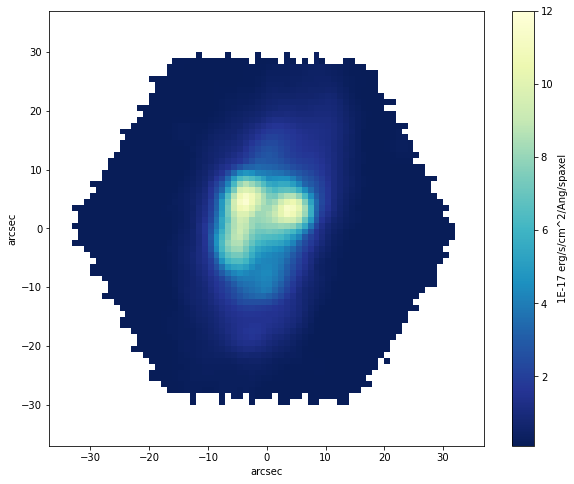

In [13]:
do_not_use = (mask & 2**10) != 0
flux_m = np.ma.array(flux, mask=do_not_use)

redshift = 0.115137
ind_wave = np.where((wave / (1 + redshift) > 6560) & (wave / (1 + redshift) < 6570))[0]
halpha = flux_m[:, :, ind_wave].sum(axis=2)
im = halpha.T

# Convert from array indices to arcsec relative to IFU center
dx = flux_header['CD1_1'] * 7200.  # degree to 0.5 arcsec
dy = flux_header['CD2_2'] * 7200.  # degree to 0.5 arcsec
x_extent = (np.array([0., im.shape[0]]) - (im.shape[0] - x_center)) * dx * (-1)
y_extent = (np.array([0., im.shape[1]]) - (im.shape[1] - y_center)) * dy
extent = [x_extent[0], x_extent[1], y_extent[0], y_extent[1]]

fig=plt.figure(figsize=(10,8))
plt.imshow(im, extent=extent, cmap="YlGnBu_r", vmin=0.1, vmax=12, origin='lower', interpolation='none')
plt.colorbar(label=flux_header['BUNIT'])
plt.xlabel('arcsec')
plt.ylabel('arcsec')

NII 6549.86

Text(0, 0.5, 'arcsec')

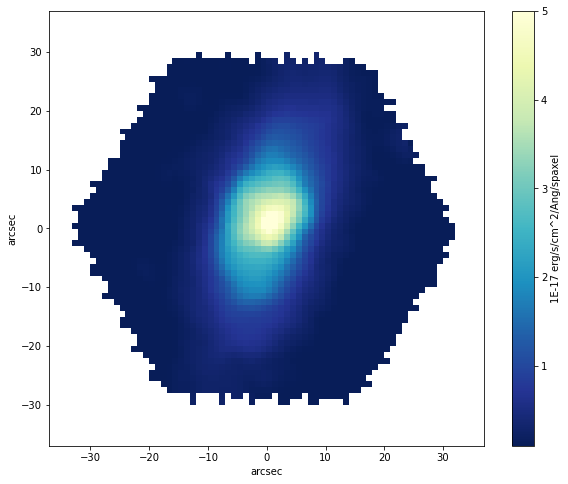

In [66]:
do_not_use = (mask & 2**10) != 0
flux_m = np.ma.array(flux, mask=do_not_use)

redshift = 0.115137
ind_wave = np.where((wave / (1 + redshift) > 6545) & (wave / (1 + redshift) < 6555))[0]
halpha = flux_m[:, :, ind_wave].sum(axis=2)
im = halpha.T

# Convert from array indices to arcsec relative to IFU center
dx = flux_header['CD1_1'] * 7200.  # degree to 0.5 arcsec
dy = flux_header['CD2_2'] * 7200.  # degree to 0.5 arcsec
x_extent = (np.array([0., im.shape[0]]) - (im.shape[0] - x_center)) * dx * (-1)
y_extent = (np.array([0., im.shape[1]]) - (im.shape[1] - y_center)) * dy
extent = [x_extent[0], x_extent[1], y_extent[0], y_extent[1]]

fig=plt.figure(figsize=(10,8))
plt.imshow(im, extent=extent, cmap="YlGnBu_r", vmin=0.1, vmax=5, origin='lower', interpolation='none')
plt.colorbar(label=flux_header['BUNIT'])
plt.xlabel('arcsec')
plt.ylabel('arcsec')

NII 6585.27

Text(0, 0.5, 'arcsec')

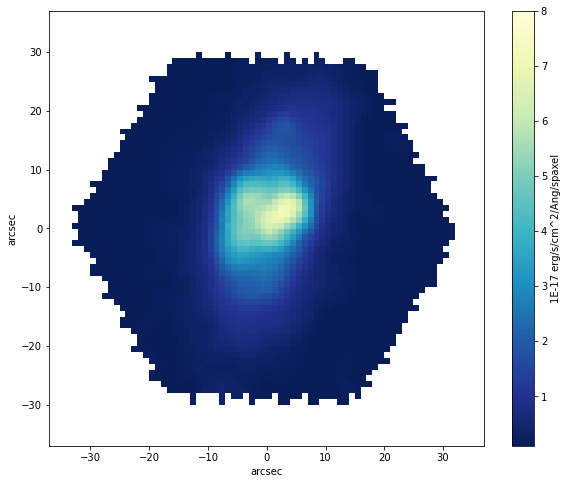

In [67]:
do_not_use = (mask & 2**10) != 0
flux_m = np.ma.array(flux, mask=do_not_use)

redshift = 0.115137
ind_wave = np.where((wave / (1 + redshift) > 6580) & (wave / (1 + redshift) < 6590))[0]
halpha = flux_m[:, :, ind_wave].sum(axis=2)
im = halpha.T

# Convert from array indices to arcsec relative to IFU center
dx = flux_header['CD1_1'] * 7200.  # degree to 0.5 arcsec
dy = flux_header['CD2_2'] * 7200.  # degree to 0.5 arcsec
x_extent = (np.array([0., im.shape[0]]) - (im.shape[0] - x_center)) * dx * (-1)
y_extent = (np.array([0., im.shape[1]]) - (im.shape[1] - y_center)) * dy
extent = [x_extent[0], x_extent[1], y_extent[0], y_extent[1]]

fig=plt.figure(figsize=(10,8))
plt.imshow(im, extent=extent, cmap="YlGnBu_r", vmin=0.1, vmax=8, origin='lower', interpolation='none')
plt.colorbar(label=flux_header['BUNIT'])
plt.xlabel('arcsec')
plt.ylabel('arcsec')

SII 6718.29

Text(0, 0.5, 'arcsec')

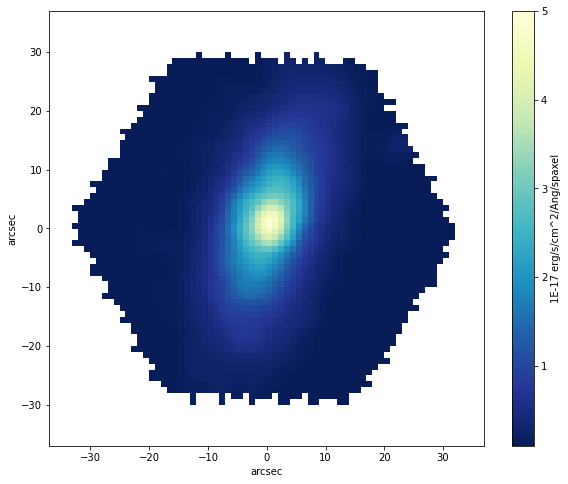

In [68]:
do_not_use = (mask & 2**10) != 0
flux_m = np.ma.array(flux, mask=do_not_use)

redshift = 0.115137
ind_wave = np.where((wave / (1 + redshift) > 6512) & (wave / (1 + redshift) < 6522))[0]
halpha = flux_m[:, :, ind_wave].sum(axis=2)
im = halpha.T

# Convert from array indices to arcsec relative to IFU center
dx = flux_header['CD1_1'] * 7200.  # degree to 0.5 arcsec
dy = flux_header['CD2_2'] * 7200.  # degree to 0.5 arcsec
x_extent = (np.array([0., im.shape[0]]) - (im.shape[0] - x_center)) * dx * (-1)
y_extent = (np.array([0., im.shape[1]]) - (im.shape[1] - y_center)) * dy
extent = [x_extent[0], x_extent[1], y_extent[0], y_extent[1]]

fig=plt.figure(figsize=(10,8))
plt.imshow(im, extent=extent, cmap="YlGnBu_r", vmin=0.1, vmax=5, origin='lower', interpolation='none')
plt.colorbar(label=flux_header['BUNIT'])
plt.xlabel('arcsec')
plt.ylabel('arcsec')

OIII 5008.240

Text(0, 0.5, 'arcsec')

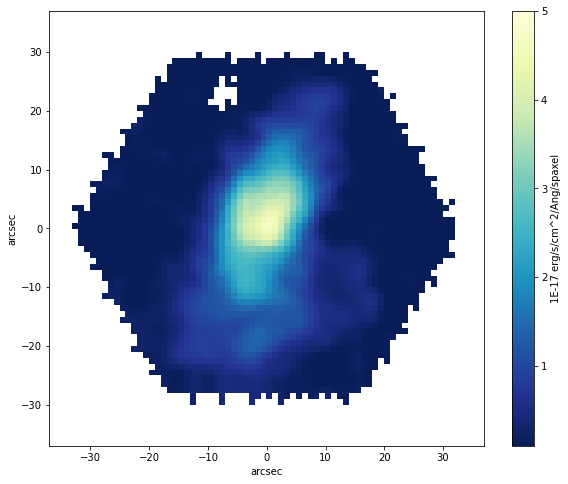

In [69]:
do_not_use = (mask & 2**10) != 0
flux_m = np.ma.array(flux, mask=do_not_use)

redshift = 0.115137
ind_wave = np.where((wave / (1 + redshift) > 5002) & (wave / (1 + redshift) < 5012))[0]
halpha = flux_m[:, :, ind_wave].sum(axis=2)
im = halpha.T

# Convert from array indices to arcsec relative to IFU center
dx = flux_header['CD1_1'] * 7200.  # degree to 0.5 arcsec
dy = flux_header['CD2_2'] * 7200.  # degree to 0.5 arcsec
x_extent = (np.array([0., im.shape[0]]) - (im.shape[0] - x_center)) * dx * (-1)
y_extent = (np.array([0., im.shape[1]]) - (im.shape[1] - y_center)) * dy
extent = [x_extent[0], x_extent[1], y_extent[0], y_extent[1]]

fig=plt.figure(figsize=(10,8))
plt.imshow(im, extent=extent, cmap="YlGnBu_r", vmin=0.1, vmax=5, origin='lower', interpolation='none')
plt.colorbar(label=flux_header['BUNIT'])
plt.xlabel('arcsec')
plt.ylabel('arcsec')

OII 3728.30

Text(0, 0.5, 'arcsec')

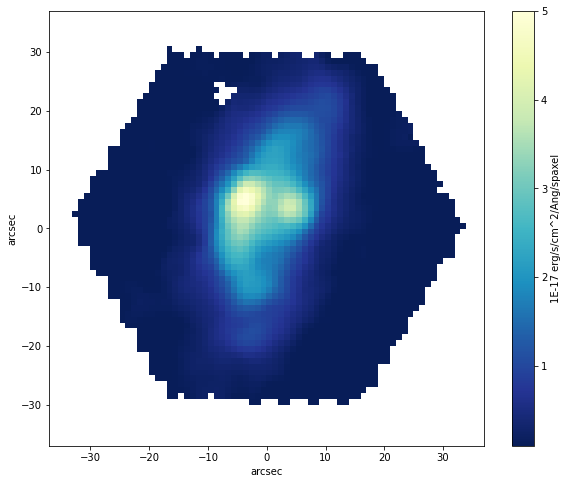

In [70]:
do_not_use = (mask & 2**10) != 0
flux_m = np.ma.array(flux, mask=do_not_use)

redshift = 0.115137
ind_wave = np.where((wave / (1 + redshift) > 3722) & (wave / (1 + redshift) < 3732))[0]
halpha = flux_m[:, :, ind_wave].sum(axis=2)
im = halpha.T

# Convert from array indices to arcsec relative to IFU center
dx = flux_header['CD1_1'] * 7200.  # degree to 0.5 arcsec
dy = flux_header['CD2_2'] * 7200.  # degree to 0.5 arcsec
x_extent = (np.array([0., im.shape[0]]) - (im.shape[0] - x_center)) * dx * (-1)
y_extent = (np.array([0., im.shape[1]]) - (im.shape[1] - y_center)) * dy
extent = [x_extent[0], x_extent[1], y_extent[0], y_extent[1]]

fig=plt.figure(figsize=(10,8))
plt.imshow(im, extent=extent, cmap="YlGnBu_r", vmin=0.1, vmax=5, origin='lower', interpolation='none')
plt.colorbar(label=flux_header['BUNIT'])
plt.xlabel('arcsec')
plt.ylabel('arcsec')

Intro: I am using the data from the previous code to construct a velocity map of a galaxy. 

In [130]:
import os
import numpy as np
import matplotlib.pyplot as plt
from astropy import wcs
from astropy.io import fits
import pandas
import scipy.optimize
from scipy.interpolate import griddata
z_r=0.115167 #redshift
c = 2.99792458e5

In [119]:
cube = fits.open('/Users/lauragaravito/Downloads/manga_8244_12704/manga-8244-12704-LINCUBE.fits')

In [120]:
flux = np.transpose(cube['FLUX'].data, axes=(2, 1, 0))
ivar = np.transpose(cube['IVAR'].data, axes=(2, 1, 0))
mask = np.transpose(cube['MASK'].data, axes=(2, 1, 0))

wave = cube['WAVE'].data
flux_header = cube['FLUX'].header

In [121]:
def flux_f(l_obs, C, z, sigma, Aha, Ana, Anb):
    l_ha = 6564.61
    l_niia = 6549.86
    l_niib = 6585.27
    return C + Aha*np.exp(-((l_obs-l_ha*(1+z))**2)/(2*sigma**2))\
            + Ana*np.exp(-((l_obs-l_niia*(1+z))**2)/(2*sigma**2))\
            + Anb*np.exp(-((l_obs-l_niib*(1+z))**2)/(2*sigma**2))



In [122]:
ind = []
wavelengths_lamb = []
l_Ha = 6564.61 * (1+z_r)
for i, element in enumerate(wave): 
    if element < (l_Ha+100) and element > (l_Ha -100):
        ind.append(i)
        wavelengths_lamb.append(element)

This is the double for loop that gives us a 74x74x12 array that includes the errors and the values. 

In [123]:
results = np.empty((74, 74, 12))
suc = fail = 0

for i, row in enumerate(flux):
    for j, col in enumerate(row):
        flux_reg = flux[i,j,ind]
        mask_reg = mask[i,j,ind]
        ivar_reg = ivar[i,j,ind]
        wave_reg = wave[ind]
        #err_flux_f = np.sqrt(1/ivar_reg)
        
        do_not_use = (mask_reg & 2**10) != 0
        flux_m = np.ma.array(flux_reg, mask=do_not_use)
        wave_m = np.ma.array(wave_reg, mask=do_not_use)
        #ivar_m = np.ma.array(ivar_reg, mask=do_not_use)
        
        C = np.ma.median(flux_m)
        
        if np.all(do_not_use):
            continue
            
        reg_error = np.sqrt(1/ivar_reg)
        reg_error_m = np.ma.array(reg_error, mask=do_not_use)
        
        
        maxf = np.ma.max(flux_m)
        sig = 3
        
        Aha = (maxf - C)
        Ana = (maxf - C)/3.5
        Anb = (maxf - C)/2
        sigmadata = reg_error_m[~reg_error_m.mask]
        
        try:
            
            xdata = wave_m[~wave_m.mask]
            ydata = flux_m[~flux_m.mask]

            bounds = ([-np.inf, -np.inf, 1, 0, 0, 0], 
                      [np.inf, np.inf, 5, (maxf - C)*1.1,
                       (maxf - C) * 0.4, (maxf - C)*0.7])
        
            p0 = [C, z_r, sig, Aha, Ana, Anb]
        
            popt, pcov = scipy.optimize.curve_fit(flux_f, xdata=xdata, ydata=ydata, p0 = p0, sigma = sigmadata, 
                                                  absolute_sigma = True, bounds = bounds,
                                                 maxfev=5000, ftol = 1e-6,xtol=1e-6)
            #perr = np.sqrt(np.diag(pcov))
            results[i, j, :] = np.concatenate((popt, np.sqrt(np.diag(pcov))))
            suc += 1 
            
        except RuntimeError:
            results[i, j, :] = np.nan
            
            fail+=1
print(suc)
print(fail)

2955
17


In [124]:
z = results[:,:,1]
A_Ha = results[:,:,3]
A_Ha_err = results[:,:,3+6]
A_Nb = results[:,:,5]
A_Nb_err = results[:,:,5+6]
C_err = results[:,:,6]

In [125]:
def vel_z(z):
    c = 2.99792458 * 10**5
    return (z - 0.115137) * c

/var/folders/4q/f04cppxd5gs3_5m7sbww809h0000gn/T/ipykernel_92024/2344572421.py:4: RuntimeWarning: divide by zero encountered in true_divide
  & ((A_Ha / A_Ha_err )> 3) & ((A_Nb / A_Nb_err )> 3) & (A_Ha > 5*C_err)
/var/folders/4q/f04cppxd5gs3_5m7sbww809h0000gn/T/ipykernel_92024/2344572421.py:4: RuntimeWarning: overflow encountered in true_divide
  & ((A_Ha / A_Ha_err )> 3) & ((A_Nb / A_Nb_err )> 3) & (A_Ha > 5*C_err)
/var/folders/4q/f04cppxd5gs3_5m7sbww809h0000gn/T/ipykernel_92024/2344572421.py:4: RuntimeWarning: invalid value encountered in true_divide
  & ((A_Ha / A_Ha_err )> 3) & ((A_Nb / A_Nb_err )> 3) & (A_Ha > 5*C_err)


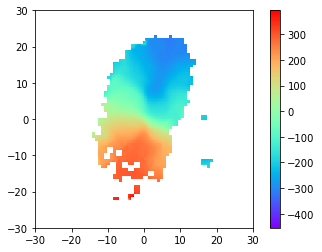

In [126]:
velocities = (results[:,:,1]-z_r)*2.99792458*10**5

valid_positions = (velocities > -500) & (velocities < 500)\
                    & ((A_Ha / A_Ha_err )> 3) & ((A_Nb / A_Nb_err )> 3) & (A_Ha > 5*C_err)

valid_velocities = np.where(valid_positions, velocities, np.nan)

plt.imshow(np.transpose(valid_velocities), cmap="rainbow", origin="lower", extent = [-30,30,-30,30])

plt.colorbar()

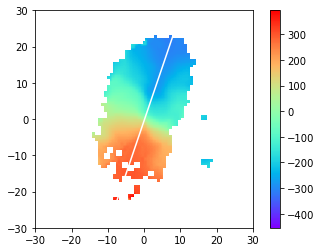

In [127]:
plt.imshow(np.transpose(valid_velocities), cmap="rainbow", origin="lower", extent = [-30,30,-30,30])
plt.plot([-8,9],[-24,26], color='white')
plt.colorbar()

In [128]:
np.savetxt("velocities.cvs", valid_velocities, delimiter = ",")

In [131]:
valid_velocities = np.loadtxt("velocities.cvs", delimiter = ",")
error_velocities = np.loadtxt("/Users/lauragaravito/Downloads/velocities_err.csv", delimiter = ",")
velocities_error = (results [:, :, 6+1]) * c

In [132]:
dS = 1.5
dX  = dS /(((55/18)**2)+1)**(1/2)
dY = 3 * dX
sample_ys = np.arange(10,65,dY)
sample_xs = np.arange(29,47,dX)
sample_points = list(zip(sample_xs,sample_ys))

plot_f = griddata(
    np.where(~np.isnan(valid_velocities)),
    valid_velocities[~np.isnan(valid_velocities)],
    sample_points)
print(len(~np.isnan(valid_velocities)))

plot_e = griddata(
    np.where(~np.isnan(error_velocities)),
    error_velocities[~np.isnan(error_velocities)],
    sample_points)
print(len(~np.isnan(error_velocities)))

74
74


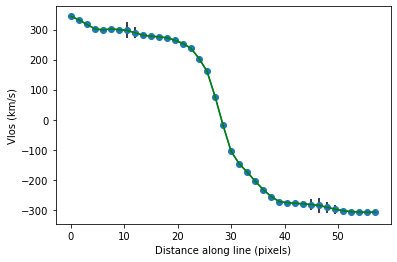

In [133]:
dist = np.linspace(0,len(plot_f)-1,len(plot_f))
plt.plot(dist*1.5,plot_f,"-o")
plt.errorbar(dist*1.5,plot_f, xerr = None, yerr = plot_e, ecolor = 'black',color='green')
plt.xlabel("Distance along line (pixels)")
plt.ylabel("Vlos (km/s)")
plt.show()

This is the plot for the line of sight velocity profile as a function of distance measured in pixels. 
The error bars are plotted in black

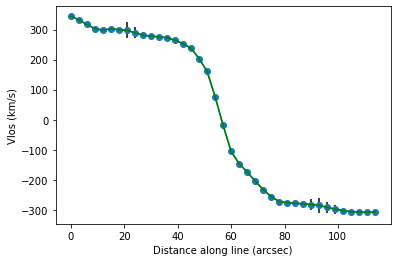

In [134]:
dist = np.linspace(0,len(plot_f)-1,len(plot_f))
plt.plot(dist*1.5*2,plot_f,"-o")
plt.errorbar(dist*1.5*2,plot_f, xerr = None, yerr = plot_e, ecolor = 'black',color='green')
plt.xlabel("Distance along line (arcsec)")
plt.ylabel("Vlos (km/s)")
plt.show()

This is the plot for the line of sight velocity profile as a function of distance measured in pixels. The error bars are plotted in black

In [198]:
x1 = 29
x2 = 47
y1 = 10
y2 = 65
line_len = np.sqrt((x2 - x1) ** 2 + (y2 - y1) ** 2) #dist formula
stepsize = 1.5
steps = (line_len / stepsize).astype(int)
x_lin = np.arange(x1, x2, (x2 - x1) / steps)
y_lin = np.arange(y1, y2, (y2 - y1) / steps)
x_lin_int = (np.arange(x1, x2, (x2 - x1) / steps)).astype(int) 
y_lin_int = (np.arange(y1, y2, (y2 - y1) / steps)).astype(int) 
vel_lin = []
vel_lin_err = []

In [201]:
for i, val in enumerate(x_line_int):
    x = x_lin_int[i]
    y = y_lin_int[i] 
    vel_lin.append(valid_velocities[x][y]) 
    vel_lin_err.append(velocities_error[x][y])

In [202]:
diag = []
for i in range (steps):
    diag.append(np.sqrt(((x_lin[i]) ** 2) + (y_lin[i]) ** 2))
diag_int = np.sqrt((x_lin_int) ** 2 + (y_lin_int) ** 2).astype(int)
lin_interpvels = scipy.interpolate.interp1d(diag_int, vel_lin, fill_value="extrapolate")

In [203]:
diag_int = np.sqrt((x_lin_int)**2 + (y_lin_int)**2).astype(int)
lin_interpvels = scipy.interpolate.interp1d(diag_int, vel_lin, 
                                             fill_value="extrapolate")

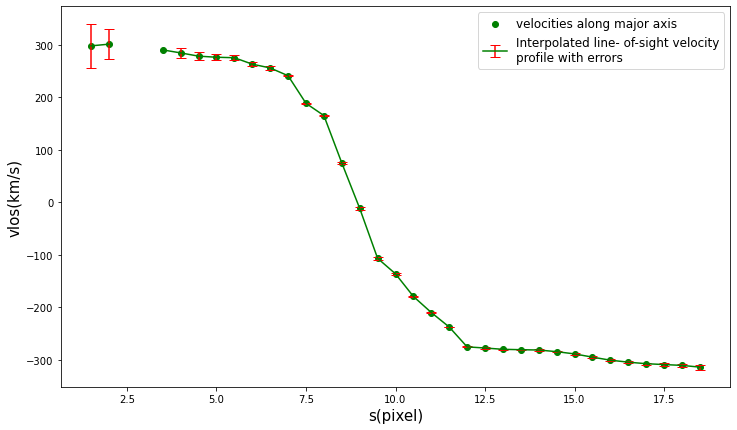

In [212]:
axis = np.arange(0, 38/2, 0.5) #pixels to arcseconds
plt.figure(figsize = (12, 7))
plt.scatter(axis, lin_interpvels(diag), color = 'green', label = 'velocities along major axis')
plt.errorbar(axis, lin_interpvels(diag), yerr = vel_lin_err, capsize = 5, color = 'green', ecolor = 'red', label = 'Interpolated line- of-sight velocity\nprofile with errors')
plt.legend(prop = {'size': 12})
plt.xlabel('s(pixel)', fontsize = 15)
plt.ylabel('vlos(km/s)', fontsize = 15)
plt.show()

In [152]:
def f_fold(x, a, b, c, d):
    return ((a - d) / (1 + (x/c) ** b)) + d

In [213]:
fit_x = []
fit_velocities = []
for i, velocities in enumerate(lin_interpvels(diag)):
    if not np.isnan(velocities):
        fit_x.append(diag[i]) 
        fit_velocities.append(velocities)
        
fake_velocities_err = np.full(len(fit_velocities), 0.1)

popt_velocities, pcov_velocities = scipy.optimize.curve_fit(f_fold, xdata = fit_x, ydata = fit_velocities,
                                                            sigma = fake_velocities_err,
                                                            check_finite = False)
folda = popt_velocities[0]
foldb = popt_velocities[1]
foldc = popt_velocities[2]
foldd = popt_velocities[3]
                                              
folda_err = pcov_velocities[0]
foldb_err = pcov_velocities[1]
foldc_err = pcov_velocities[2]
foldd_err = pcov_velocities[3]

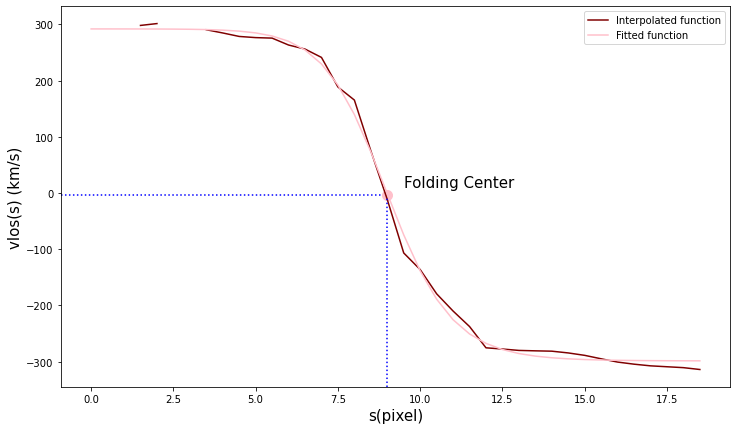

In [217]:
plt.figure(figsize = (12, 7))
plt.plot(axis, lin_interpvels(diag), color = 'maroon', label = 'Interpolated function')
plt.plot(axis, f_fold(diag, folda, foldb, foldc, foldd), color = 'pink', label = 'Fitted function')
plt.scatter(axis[18], (folda + foldd)/2, color = 'pink', s = 100) 
plt.axhline(y = (folda + foldd)/2, xmax = 0.48, linestyle = ':', color = 'blue')
plt.axvline(x = axis[18], ymax = 0.5, linestyle = ':', color = 'blue')
plt.text(9.5, 10, 'Folding Center', fontsize = 15) 
plt.xlabel('s(pixel)', fontsize = 15)
plt.ylabel('vlos(s) (km/s)', fontsize = 15)
plt.legend()
plt.show()

 Curve (in orange) fitted to the interpolated line-of-sight velocity profile of the Galaxy.

In [218]:
fold_left_vel = []
fold_left_x = []
fold_right_vel = []
fold_right_x = []
fold_left_x_flip = []
fold_right_vel_flip = []


In [219]:
for i, velocities in enumerate(lin_interpvels(diag)): 
    if diag[i] < foldc:
        fold_left_x.append(diag[i])
        fold_left_vel.append(velocities) 
    if diag[i] > foldc:
        fold_right_x.append(diag[i])
        fold_right_vel.append(velocities)

Text(0, 0.5, 'v_los (folded) (km/s)')

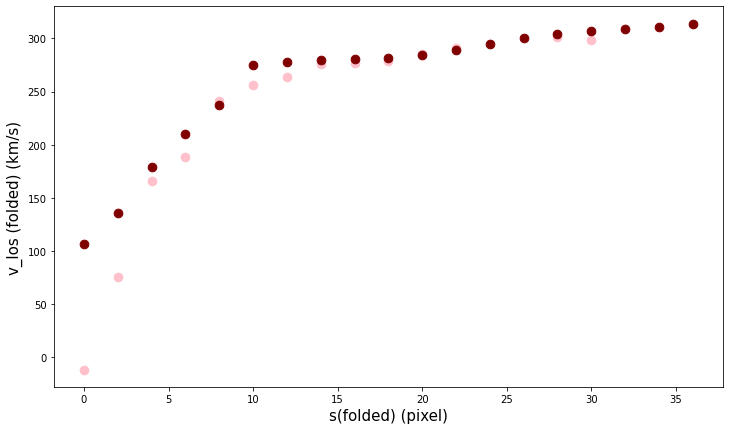

In [221]:
fold_right_vel = np.multiply(fold_right_vel, -1)

plt.figure(figsize = (12, 7))
plt.scatter(np.arange(0, 38, 2), np.flip(fold_left_vel), s = 75, color = "pink") 
plt.scatter(np.arange(0, 38, 2), fold_right_vel, s = 75, color = "maroon") 
plt.xlabel('s(folded) (pixel)', fontsize = 15)
plt.ylabel('v_los (folded) (km/s)', fontsize = 15)


Folded rotation curve of the Galaxy, displaying the velocities as a function of the pixel distance along the major axis.

Text(0, 0.5, 'v_los(folded) [km/s]')

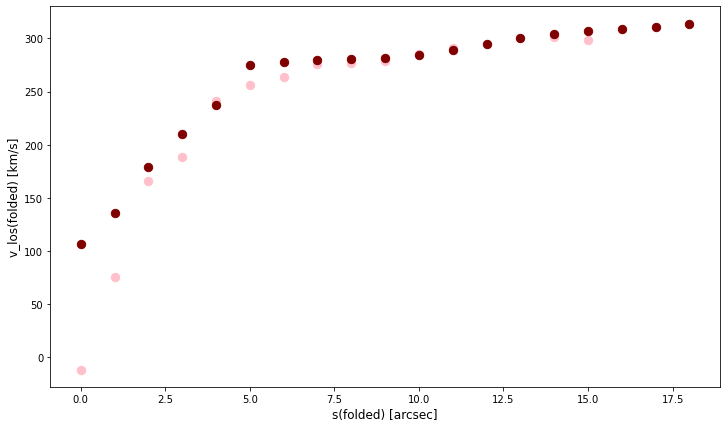

In [223]:
plt.figure(figsize = (12, 7))
plt.scatter(np.arange(0, 19), np.flip(fold_left_vel), s = 70, color = "pink") 
plt.scatter(np.arange(0, 19), fold_right_vel, s = 70, color = "maroon") 
plt.xlabel('s(folded) (arcsec)', fontsize = 12) 
plt.ylabel('v_los(folded) (km/s)', fontsize = 12)

Folded rotation curve of the galaxy, displaying the velocities as a function of the distance in arcseconds along the major axis.

Text(0, 0.5, 'v_c (r) [km/s]')

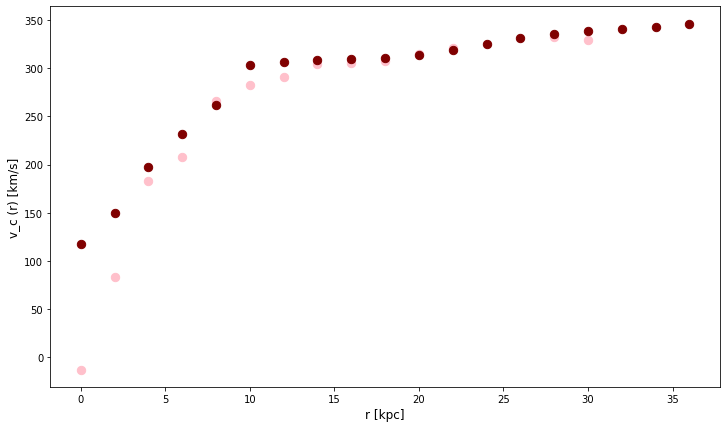

In [226]:
inc = np.radians(65.065)
plt.figure(figsize = (12, 7))
plt.scatter(np.arange(0, 38, 2), np.divide(np.flip(fold_left_vel), np.sin(inc)), s = 70, color = "pink")
plt.scatter(np.arange(0, 38, 2), np.divide(fold_right_vel, np.sin(inc)), s = 70, color = "maroon")
plt.xlabel('r [kpc)', fontsize = 12)
plt.ylabel('v_c (r) [km/s]', fontsize = 12)

 Rotation curve of the galaxy with the angle of inclination taken into account, displaying the velocities as a function of the distance along the major axis in kiloparsecs.